In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200217_geminin'

In [3]:
file=f'{bigDir}\\200217_cellinfo_v7.csv'

In [4]:
data=pd.read_csv(file)

# data visualizations 

In [5]:
data=data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [6]:
data.head()

file     original cell name                         movie  \
0  20200217_cell_00.ciz  2020024-19-21-63X.czi  20200217pinducer gemininxy19   
1  20200217_cell_01.ciz  2020024-19-27-63X.czi  20200217pinducer gemininxy19   
2  20200217_cell_02.ciz  2020024-19-39-63X.czi  20200217pinducer gemininxy19   
3  20200217_cell_03.ciz  2020024-19-49-63X.czi  20200217pinducer gemininxy19   
4  20200217_cell_04.ciz  2020024-19-51-63X.czi  20200217pinducer gemininxy19   

          x        y ab1 (MCM)  ab1 ch ab2 (heterochromatin)  ab2 ch  DAPI ch  \
0  1312.741  235.893      MCM3       1                   HP1       2        3   
1  1323.444  397.761      MCM3       1                   HP1       2        3   
2  1772.297  584.995      MCM3       1                   HP1       2        3   
3   163.044  727.256      MCM3       1                   HP1       2        3   
4  1791.955  755.367      MCM3       1                   HP1       2        3   

   ...  outer_DAPI_total  nuc_DAPI_het inner_DAPI_het  outer_DAPI_het  \
0  ...      1.425797e+09  7.791948e+08   4.701984e+08     308996412.0   
1  ...      1.407304e+09  7.501514e+08   4.772260e+08     272925417.0   
2  ...      2.488888e+09  1.402612e+09   1.055936e+09     346675531.0   
3  ...      1.395355e+09  8.721556e+08   6.594996e+08     212655978.0   
4  ...      1.422570e+09  7.409389e+08   4.345226e+08     306416352.0   

    nuc_DAPI_eu inner_DAPI_eu outer_DAPI_eu        day physical_age  \
0  1.214105e+09    97303963.0  1.116801e+09  d20200217     8.833333   
1  1.302409e+09   168031096.0  1.134378e+09  d20200217     5.666667   
2  2.494576e+09   352363680.0  2.142212e+09  d20200217          NaN   
3  1.360779e+09   178079736.0  1.182699e+09  d20200217     7.833333   
4  1.222306e+09   106151998.0  1.116154e+09  d20200217     5.666667   

   mol_age_mod  
0        0.948  
1        0.465  
2        2.001  
3        1.063  
4        0.579  

[5 rows x 49 columns]

In [7]:
data.group.unique()

array(['CTL', 'DOX_7h', 'TSA_7h'], dtype=object)

In [8]:
CTL=data.loc[(data.group=='CTL'),:].copy()

In [9]:
DOX=data.loc[(data.group=='DOX_7h'),:].copy()

In [10]:
TSA=data.loc[(data.group=='TSA_7h'),:].copy()

# group 'Control'
## first 11 plots = total nucleus 

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


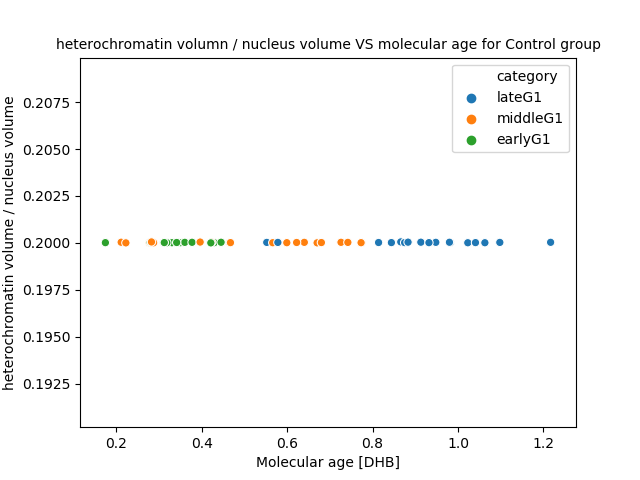

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age for Control group')

In [15]:
%matplotlib notebook
CTL['temp']=CTL.nuc_vol_het/CTL.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age for Control group',fontsize=10)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


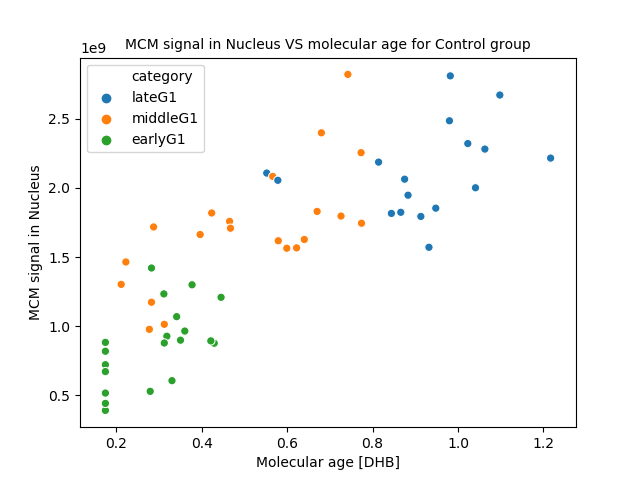

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for Control group')

In [17]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for Control group', fontsize=10)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


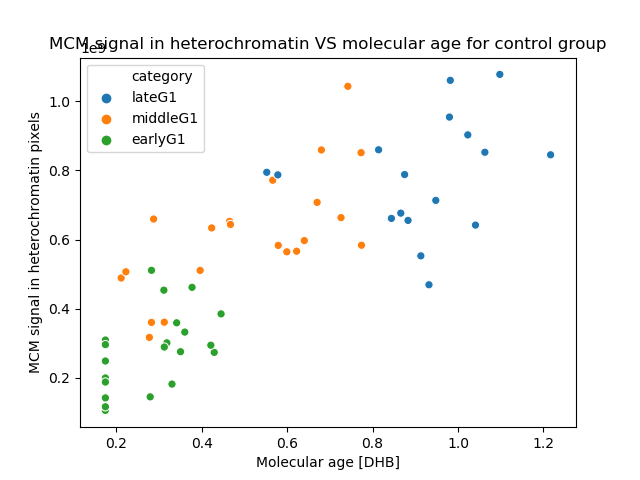

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age for control group')

In [18]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age for control group', fontsize=12)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


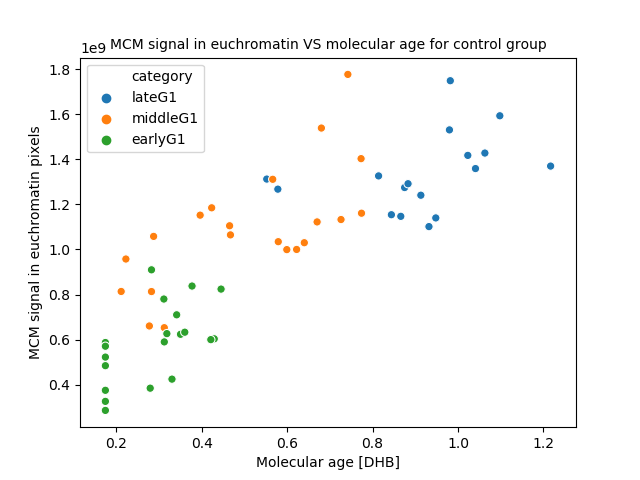

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age for control group')

In [21]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age for control group', fontsize=10)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


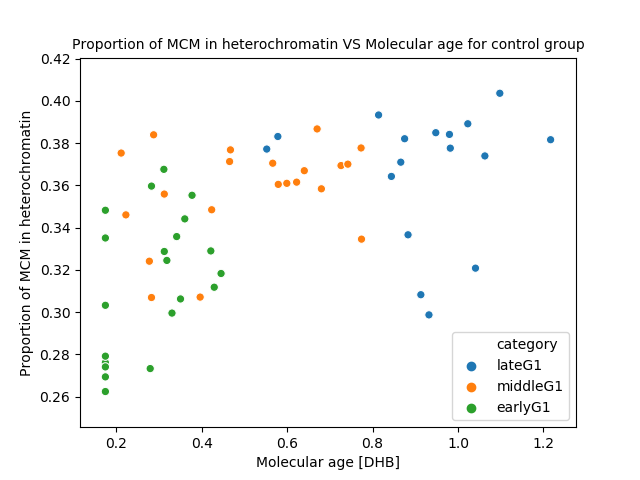

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age for control group')

In [22]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_het/CTL.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age for control group', fontsize=10)

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


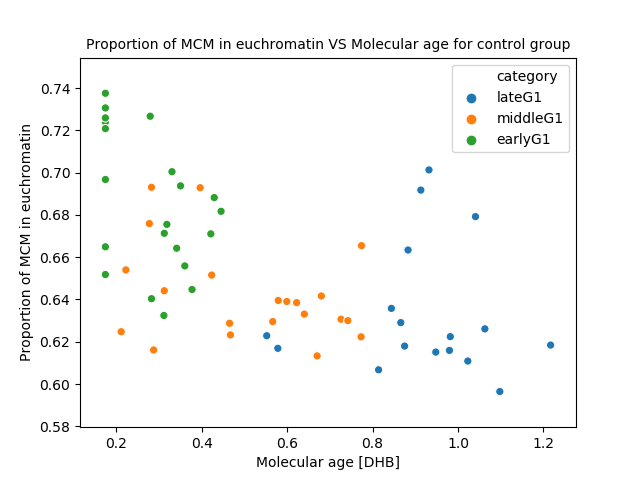

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age for control group')

In [23]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_eu/CTL.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age for control group', fontsize=10)

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


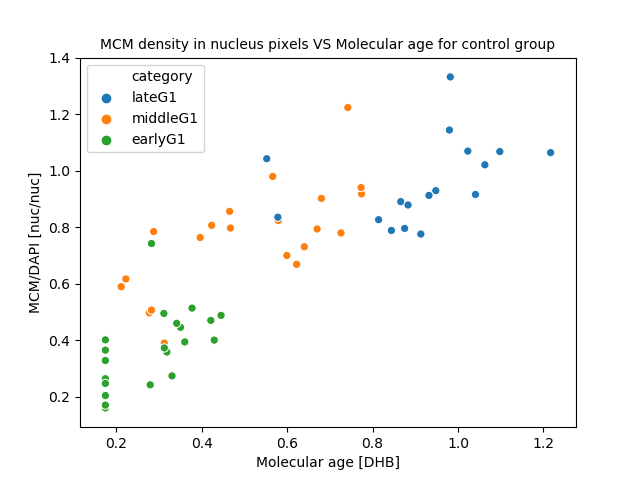

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age for control group')

In [24]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_total/CTL.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age for control group', fontsize=10)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


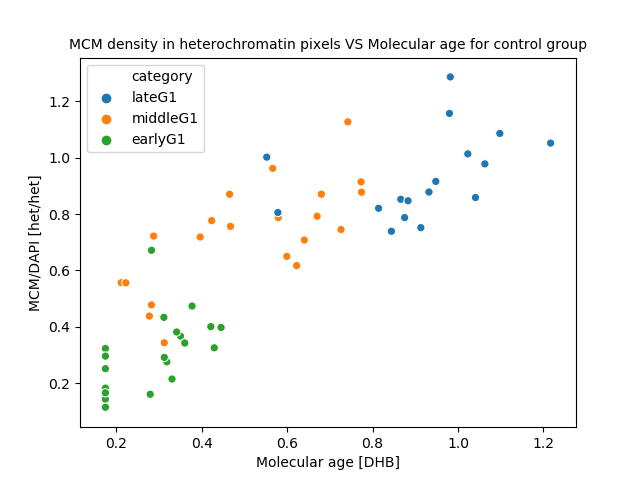

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for control group')

In [25]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_het/CTL.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for control group', fontsize=10)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


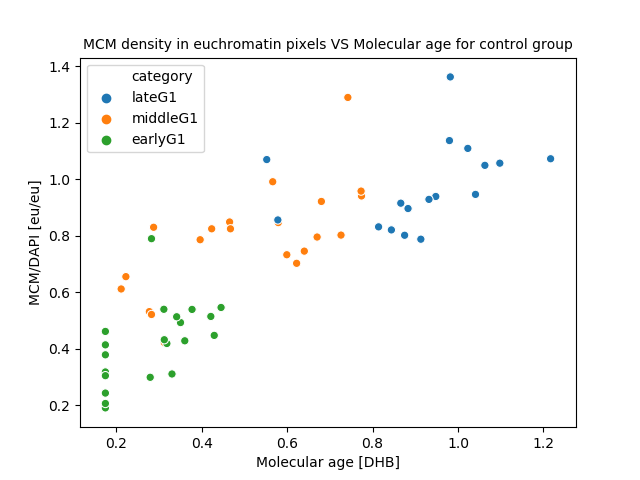

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age for control group')

In [26]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_eu/CTL.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age for control group', fontsize=10)

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


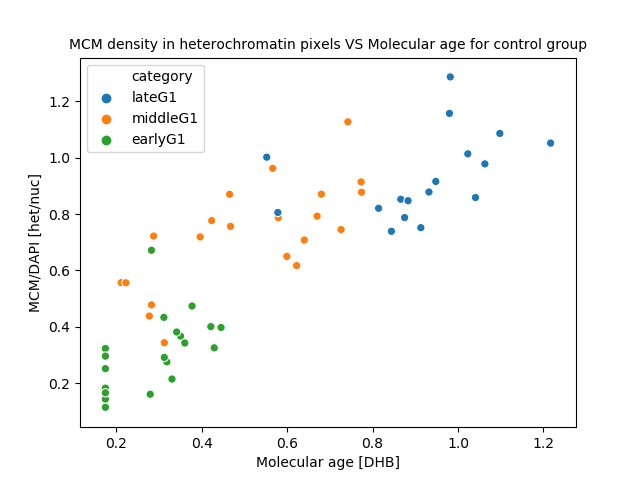

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for control group')

In [11]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_het/CTL.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for control group', fontsize=10)

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


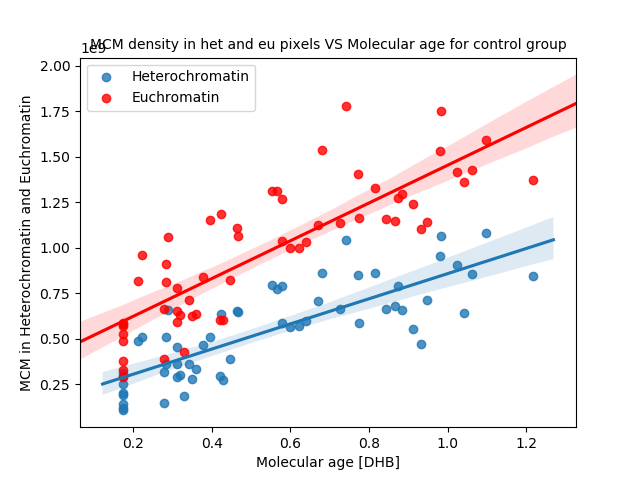

In [28]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_het
CTL['temp2']=CTL.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=CTL.loc[(['G1' in x for x in CTL.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=CTL.loc[(['G1' in x for x in CTL.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age for control group', fontsize=10)
plt.legend(loc="upper left")



## 11. MCM/Vol in total, het, eu

<IPython.core.display.Javascript object>


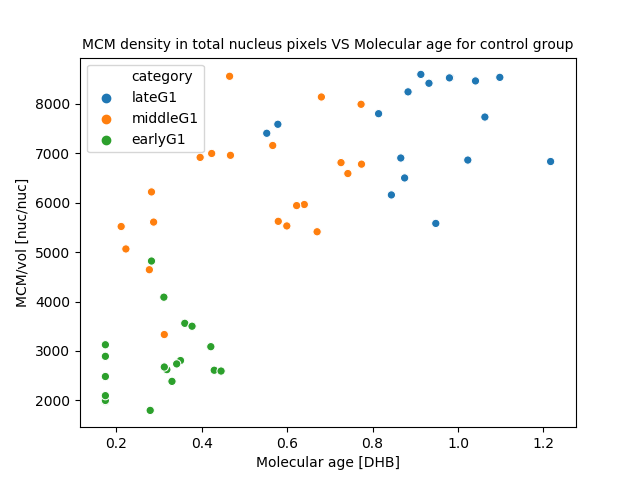

Text(0.5, 1.0, 'MCM density in total nucleus pixels VS Molecular age for control group')

In [29]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_total/CTL.nuc_vol_total

sn.scatterplot(x='mol_age_mod',y='temp', data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [nuc/nuc]')
plt.title('MCM density in total nucleus pixels VS Molecular age for control group', fontsize=10)

<IPython.core.display.Javascript object>


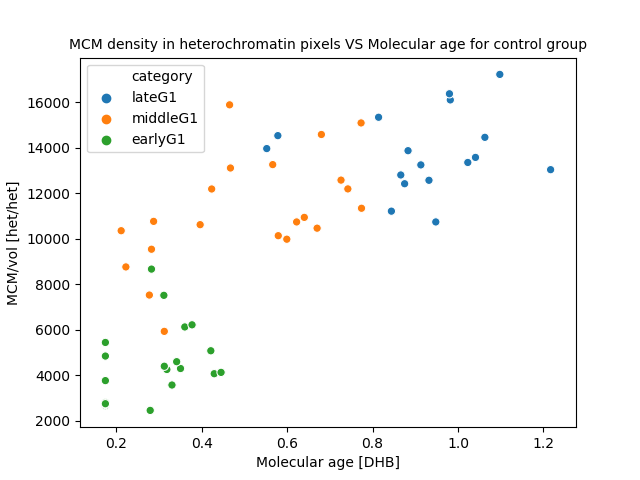

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for control group')

In [30]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_het/CTL.nuc_vol_het

sn.scatterplot(x='mol_age_mod',y='temp', data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for control group', fontsize=10)

<IPython.core.display.Javascript object>


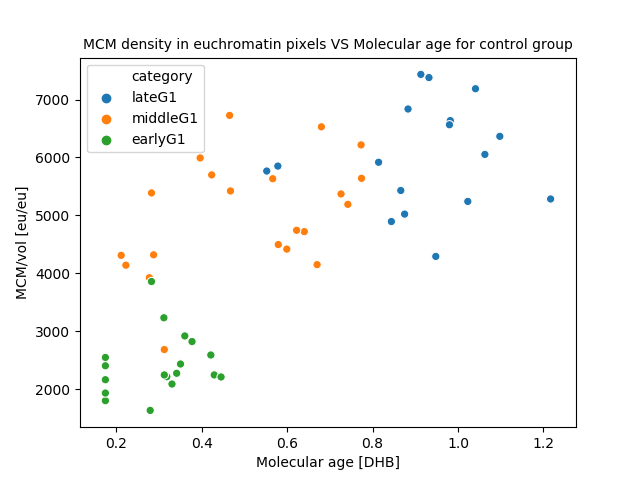

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age for control group')

In [31]:
%matplotlib notebook
CTL['temp']=CTL.nuc_mcm_eu/CTL.nuc_vol_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=CTL.loc[(['G1' in x for x in CTL.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age for control group', fontsize=10)

## #12.  mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


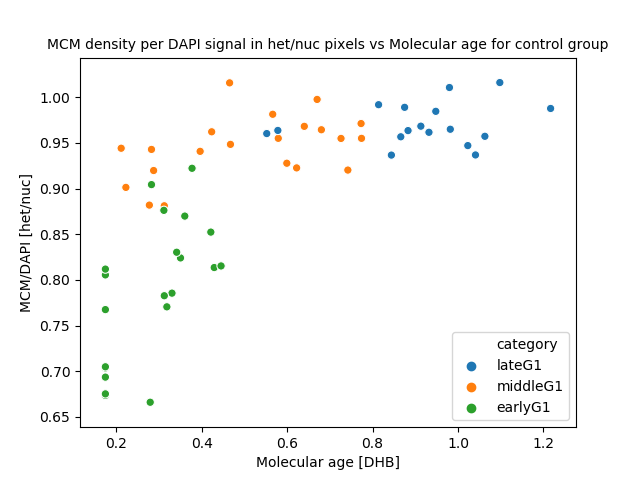

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age for control group')

In [33]:
%matplotlib notebook
CTL['temp']=(CTL.nuc_mcm_het/CTL.nuc_DAPI_het)/(CTL.nuc_mcm_total/CTL.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=CTL.loc[(['G1' in x for x in CTL.category]), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age for control group', fontsize=10)

# DOX_7h

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


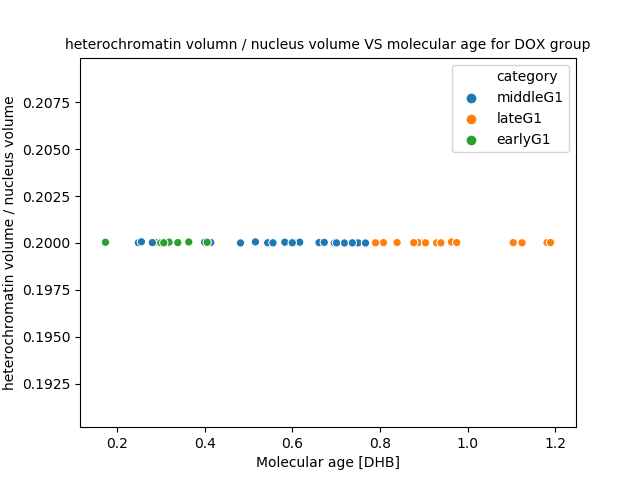

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age for DOX group')

In [34]:
%matplotlib notebook
DOX['temp']=DOX.nuc_vol_het/DOX.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age for DOX group', fontsize=10)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


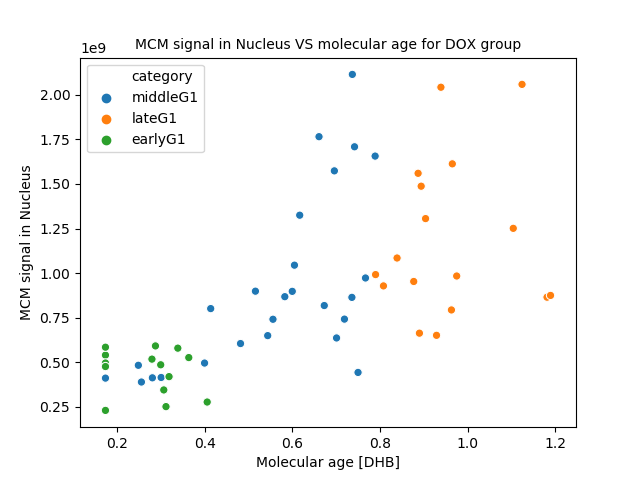

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for DOX group')

In [31]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=DOX.loc[(['G1' in x for x in DOX.category]),:], hue='category')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for DOX group', fontsize=10)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


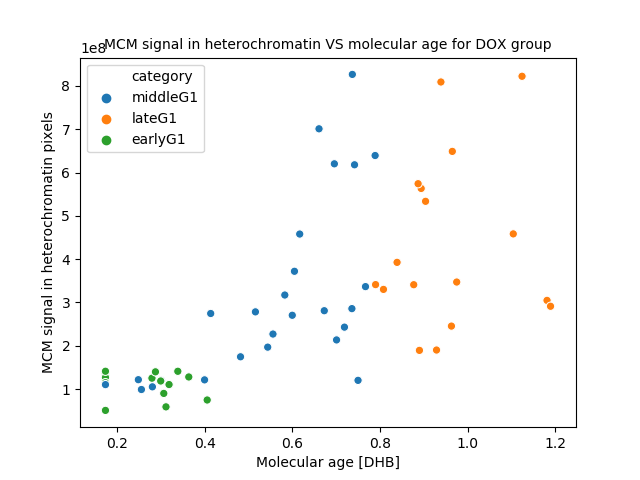

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age for DOX group')

In [36]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age for DOX group', fontsize=10)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


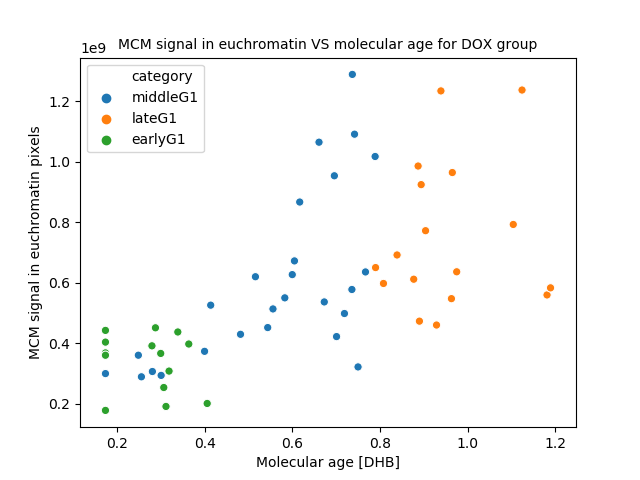

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age for DOX group')

In [37]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age for DOX group', fontsize=10)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


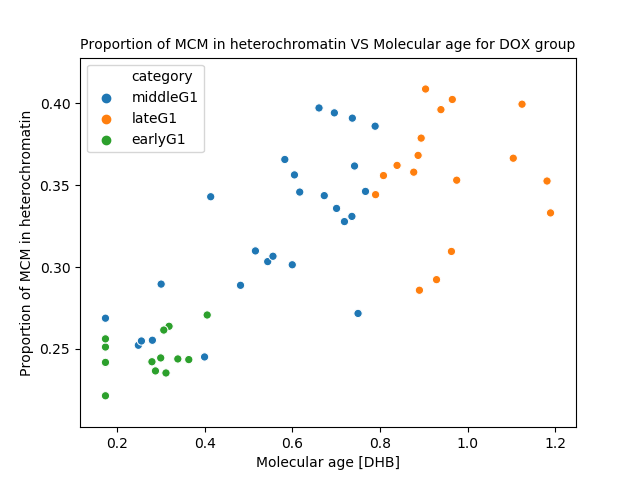

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age for DOX group')

In [38]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_het/DOX.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age for DOX group', fontsize=10)

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


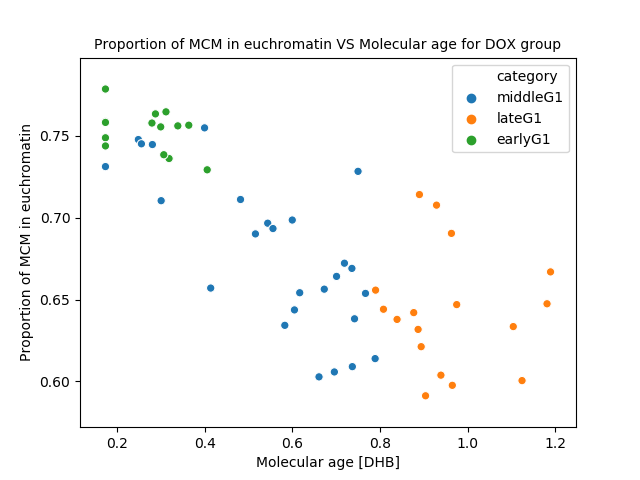

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age for DOX group')

In [39]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_eu/DOX.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age for DOX group', fontsize=10)

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


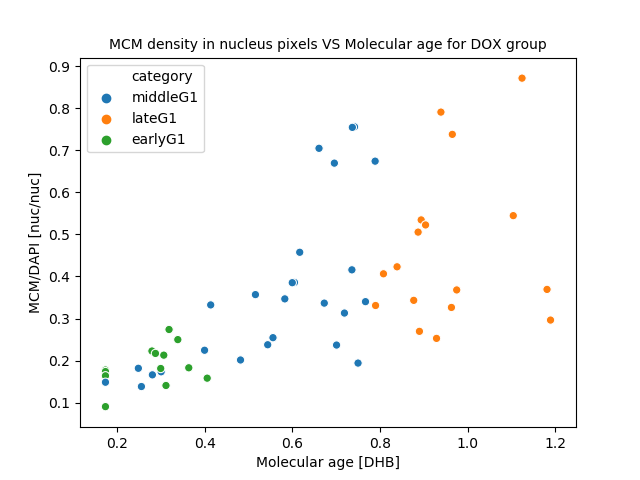

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age for DOX group')

In [40]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_total/DOX.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age for DOX group', fontsize=10)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


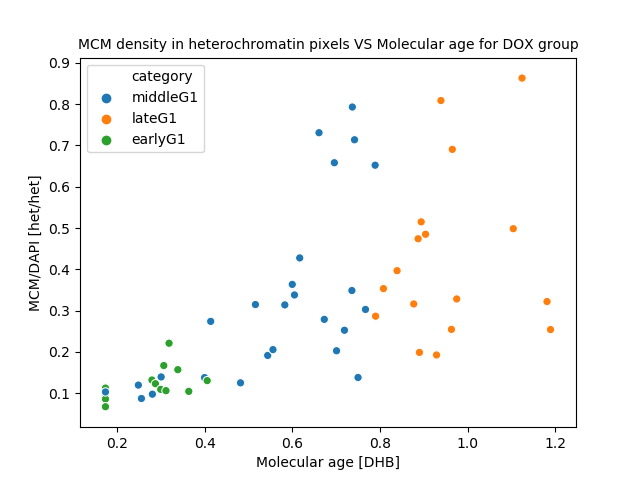

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for DOX group')

In [42]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_het/DOX.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for DOX group', fontsize=10)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


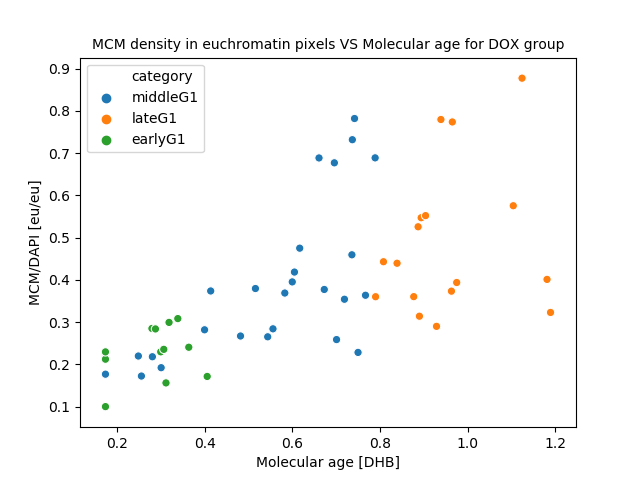

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age for DOX group')

In [43]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_eu/DOX.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age for DOX group', fontsize=10)

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


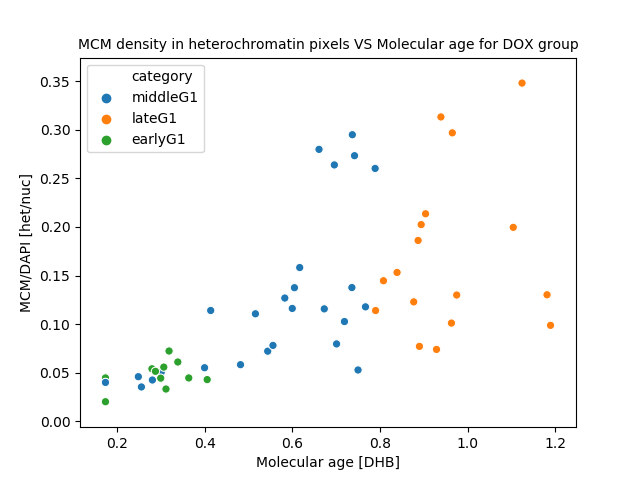

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for DOX group')

In [44]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_het/DOX.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for DOX group', fontsize=10)

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


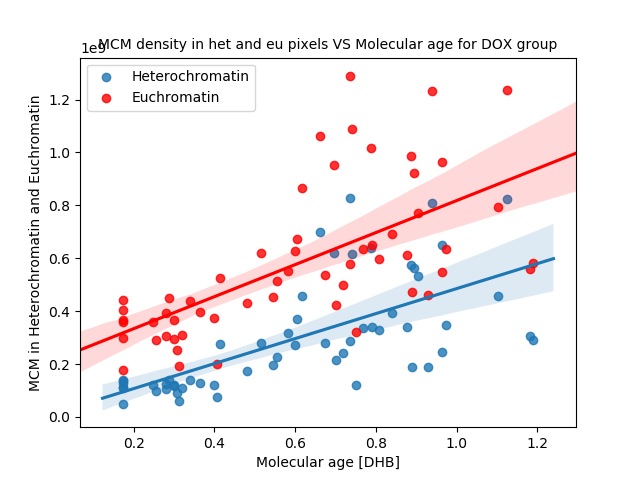

In [45]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_het
DOX['temp2']=DOX.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=DOX.loc[(['G1' in x for x in DOX.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=DOX.loc[(['G1' in x for x in DOX.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age for DOX group', fontsize=10)
plt.legend(loc="upper left")



## 11. MCM/Vol in total, het, eu

<IPython.core.display.Javascript object>


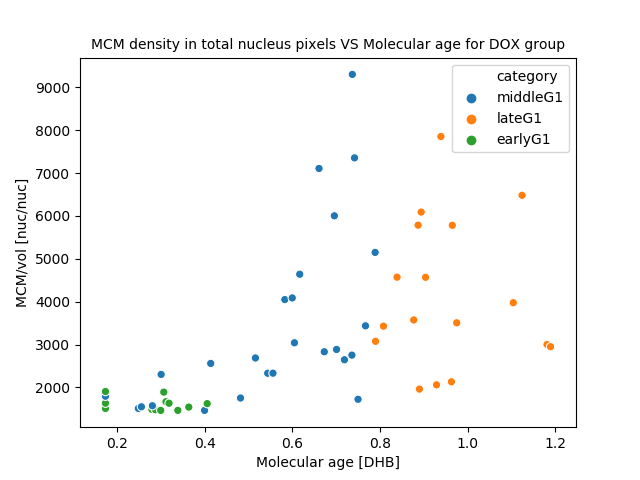

Text(0.5, 1.0, 'MCM density in total nucleus pixels VS Molecular age for DOX group')

In [46]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_total/DOX.nuc_vol_total

sn.scatterplot(x='mol_age_mod',y='temp', data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [nuc/nuc]')
plt.title('MCM density in total nucleus pixels VS Molecular age for DOX group', fontsize=10)

<IPython.core.display.Javascript object>


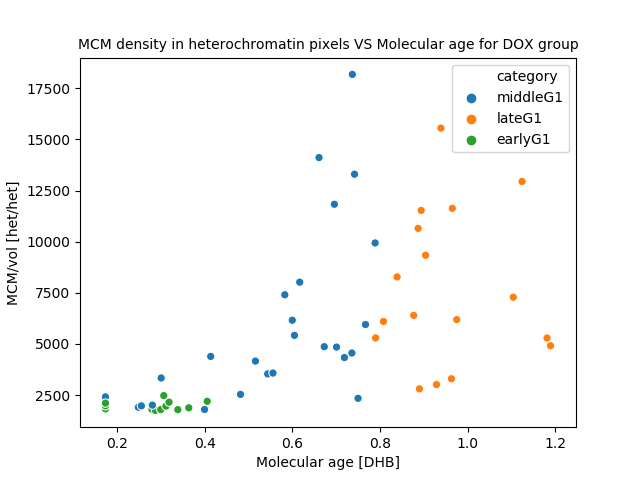

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for DOX group')

In [47]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_het/DOX.nuc_vol_het

sn.scatterplot(x='mol_age_mod',y='temp', data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for DOX group', fontsize=10)

<IPython.core.display.Javascript object>


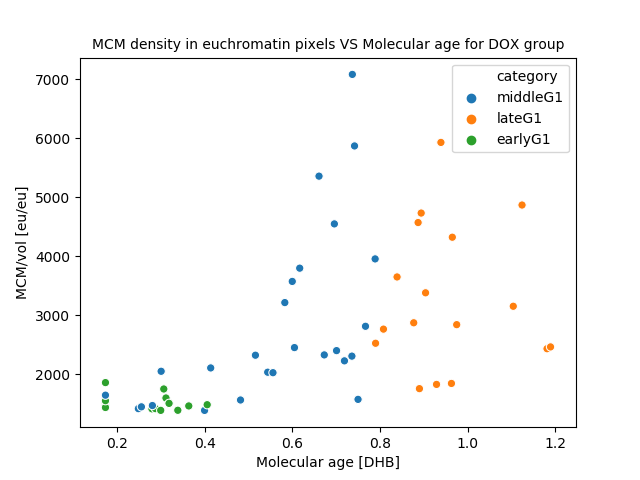

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age for DOX group')

In [48]:
%matplotlib notebook
DOX['temp']=DOX.nuc_mcm_eu/DOX.nuc_vol_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=DOX.loc[(['G1' in x for x in DOX.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age for DOX group', fontsize=10)

# 12. Comparison between DOX and Control group

<IPython.core.display.Javascript object>


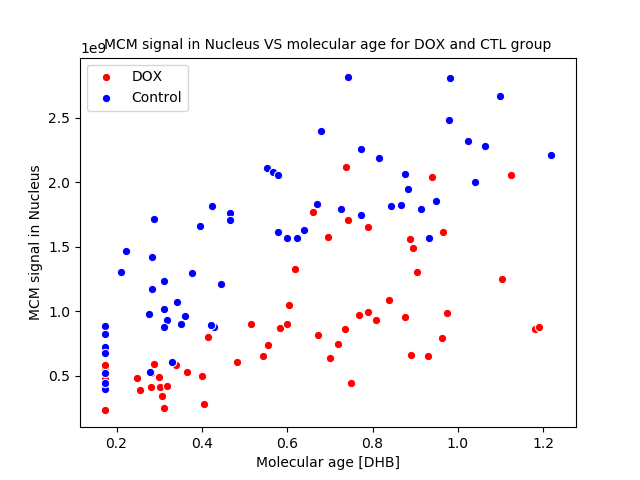

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for DOX and CTL group')

In [30]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=DOX.loc[(['G1' in x for x in DOX.category]),:],color='red',label='DOX')
sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=CTL.loc[(['G1' in x for x in CTL.category]),:],color='blue',label='Control')
plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for DOX and CTL group', fontsize=10)

<IPython.core.display.Javascript object>


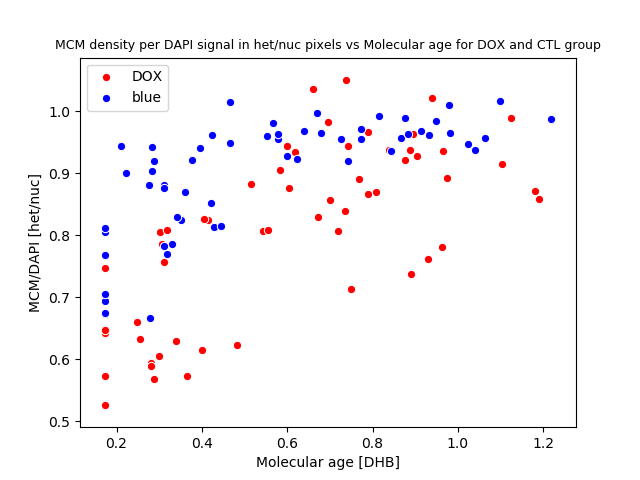

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age for DOX and CTL group')

In [29]:
%matplotlib notebook
DOX['temp']=(DOX.nuc_mcm_het/DOX.nuc_DAPI_het)/(DOX.nuc_mcm_total/DOX.nuc_DAPI_total)
CTL['temp']=(CTL.nuc_mcm_het/CTL.nuc_DAPI_het)/(CTL.nuc_mcm_total/CTL.nuc_DAPI_total)

sn.scatterplot(x='mol_age_mod',y='temp',data=DOX.loc[(['G1' in x for x in DOX.category]), :], color='red',label='DOX')
sn.scatterplot(x='mol_age_mod',y='temp',data=CTL.loc[(['G1' in x for x in CTL.category]), :], color='blue',label='blue')
plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age for DOX and CTL group', fontsize=9)

<IPython.core.display.Javascript object>


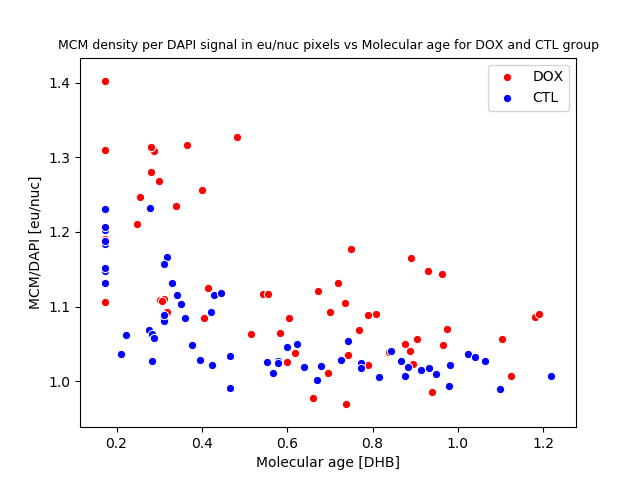

Text(0.5, 1.0, 'MCM density per DAPI signal in eu/nuc pixels vs Molecular age for DOX and CTL group')

In [27]:
%matplotlib notebook
DOX['temp']=(DOX.nuc_mcm_eu/DOX.nuc_DAPI_eu)/(DOX.nuc_mcm_total/DOX.nuc_DAPI_total)
CTL['temp']=(CTL.nuc_mcm_eu/CTL.nuc_DAPI_eu)/(CTL.nuc_mcm_total/CTL.nuc_DAPI_total)

sn.scatterplot(x='mol_age_mod',y='temp',data=DOX.loc[(['G1' in x for x in DOX.category]), :], color='red',label='DOX')
sn.scatterplot(x='mol_age_mod',y='temp',data=CTL.loc[(['G1' in x for x in CTL.category]), :], color='blue',label='CTL')
plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/nuc]')
plt.title('MCM density per DAPI signal in eu/nuc pixels vs Molecular age for DOX and CTL group', fontsize=9)

<IPython.core.display.Javascript object>


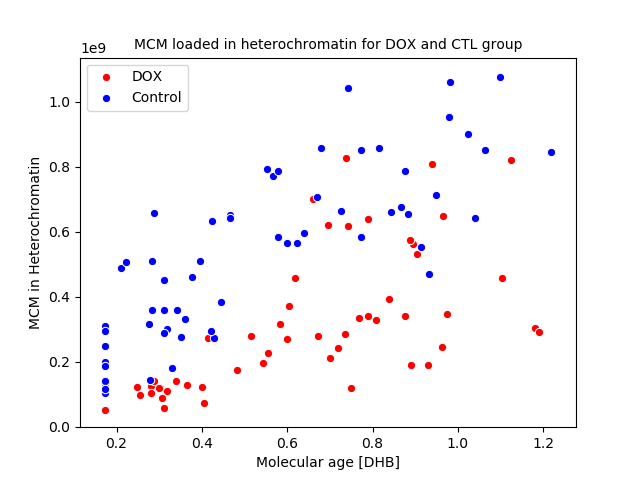

Text(0.5, 1.0, 'MCM loaded in heterochromatin for DOX and CTL group')

In [24]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=DOX.loc[(['G1' in x for x in DOX.category]), :], color='red',label='DOX')
sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=CTL.loc[(['G1' in x for x in CTL.category]), :], color='blue',label='Control')
plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin')
plt.title('MCM loaded in heterochromatin for DOX and CTL group', fontsize=10)

<IPython.core.display.Javascript object>


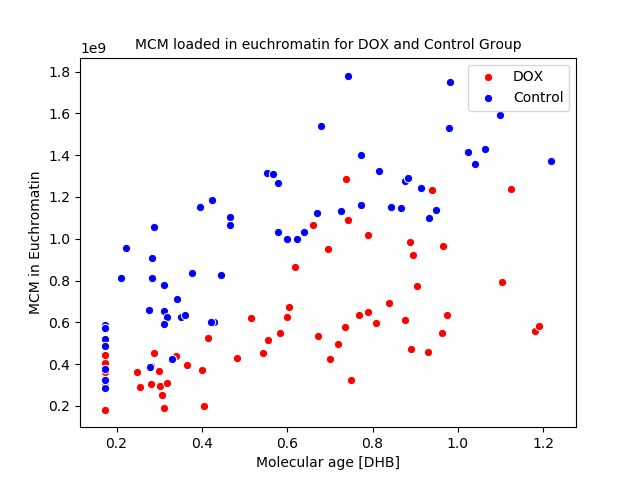

Text(0.5, 1.0, 'MCM loaded in euchromatin for DOX and Control Group')

In [23]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=DOX.loc[(['G1' in x for x in DOX.category]), :], color='red', label='DOX')
sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=CTL.loc[(['G1' in x for x in CTL.category]), :], color='blue',label='Control')
plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Euchromatin')
plt.title('MCM loaded in euchromatin for DOX and Control Group', fontsize=10)

<IPython.core.display.Javascript object>


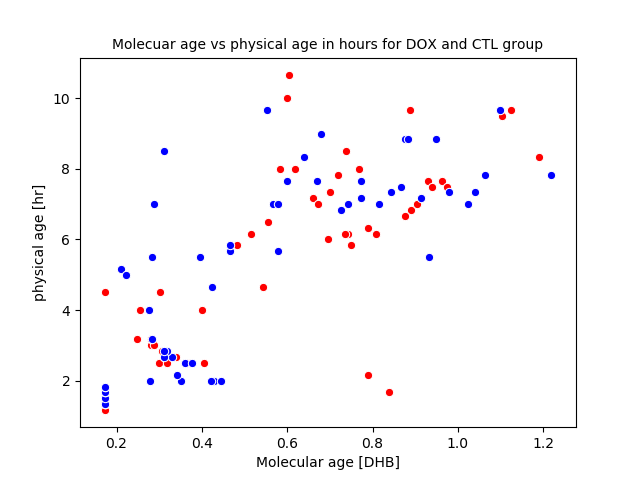

Text(0.5, 1.0, 'Molecuar age vs physical age in hours for DOX and CTL group')

In [20]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='physical_age',data=DOX.loc[(['G1' in x for x in DOX.category]), :], color='red')
sn.scatterplot(x='mol_age_mod',y='physical_age',data=CTL.loc[(['G1' in x for x in CTL.category]), :], color='blue')

plt.xlabel('Molecular age [DHB]')
plt.ylabel('physical age [hr]')
plt.title('Molecuar age vs physical age in hours for DOX and CTL group', fontsize=10)

# TSA_7h

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


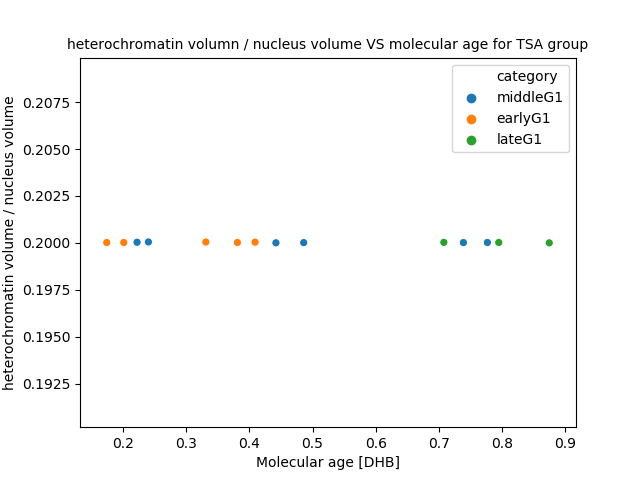

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age for TSA group')

In [51]:
%matplotlib notebook
TSA['temp']=TSA.nuc_vol_het/TSA.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age for TSA group', fontsize=10)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


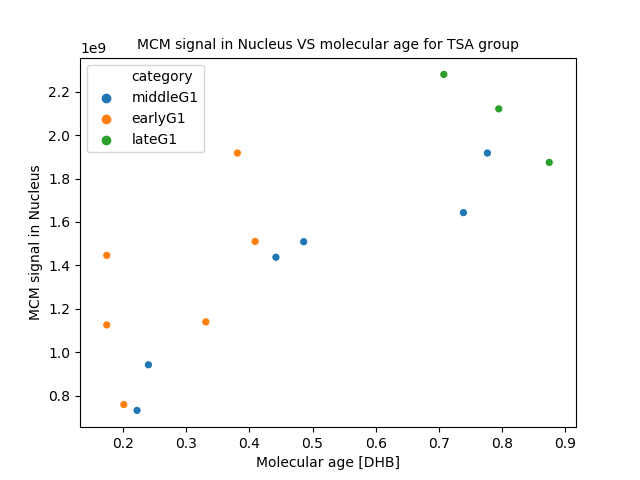

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for TSA group')

In [52]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for TSA group', fontsize=10)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


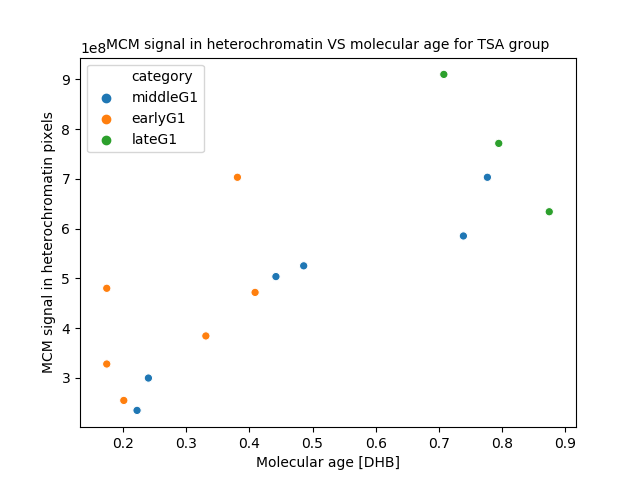

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age for TSA group')

In [53]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age for TSA group', fontsize=10)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


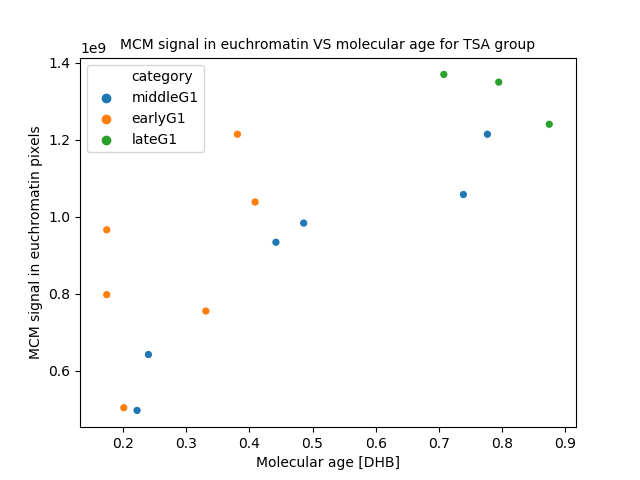

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age for TSA group')

In [54]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age for TSA group', fontsize=10)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


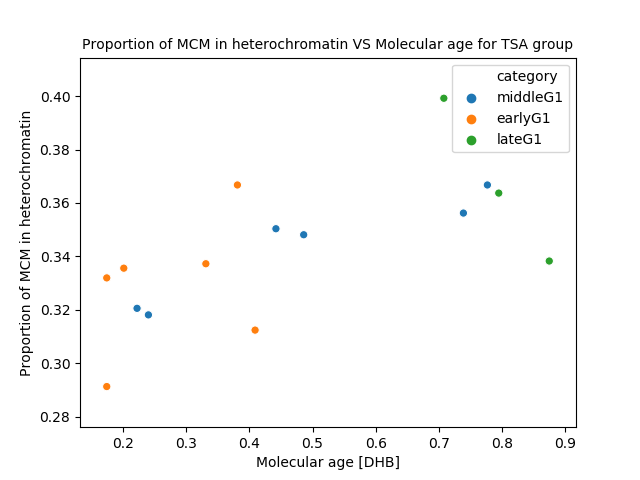

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age for TSA group')

In [55]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_het/TSA.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age for TSA group', fontsize=10)

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


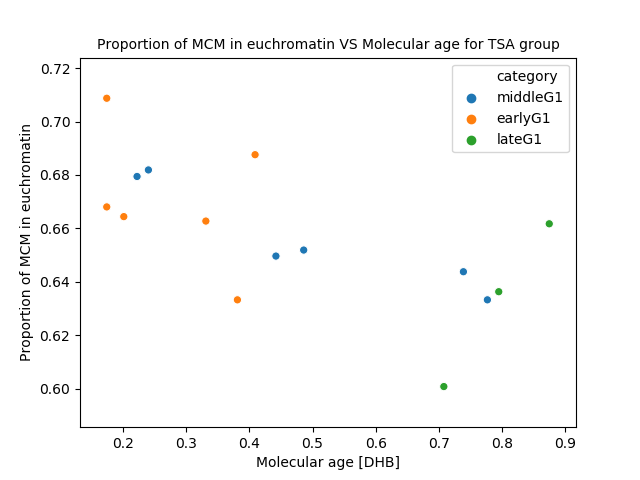

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age for TSA group')

In [56]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_eu/TSA.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age for TSA group', fontsize=10)

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


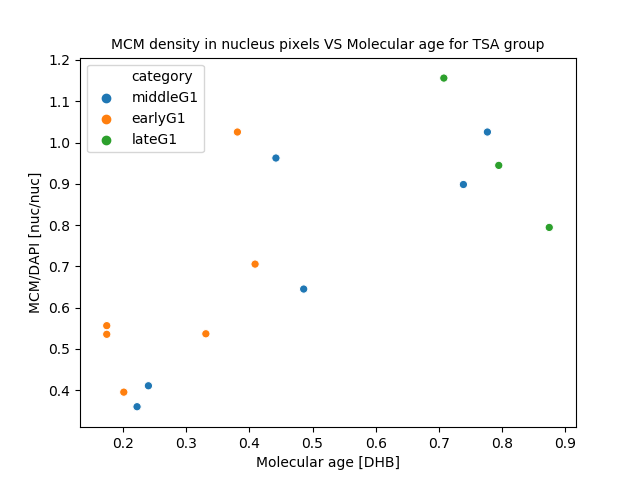

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age for TSA group')

In [57]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_total/TSA.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age for TSA group', fontsize=10)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


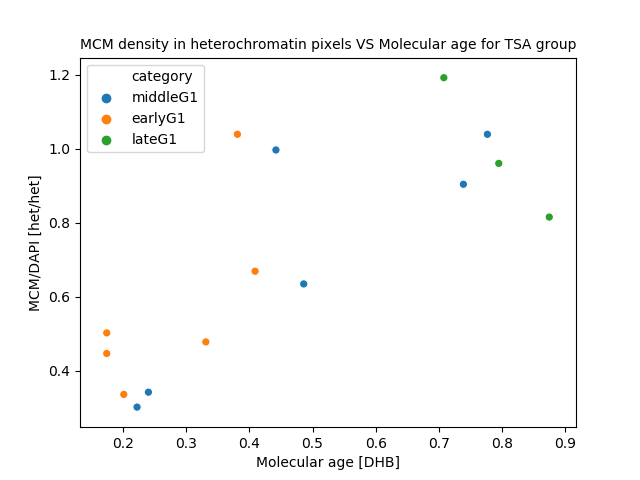

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for TSA group')

In [58]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_het/TSA.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for TSA group', fontsize=10)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


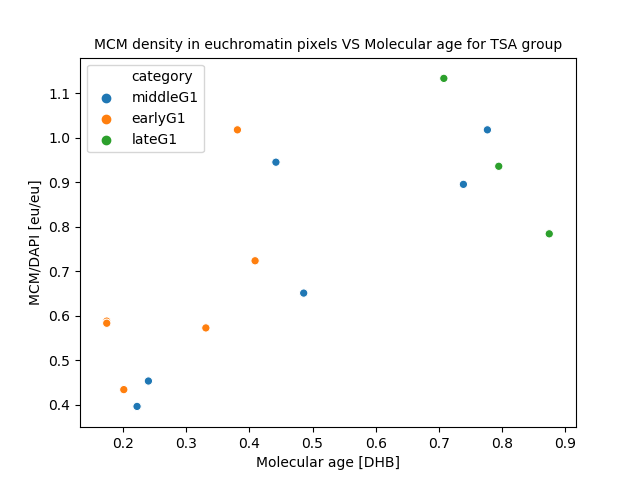

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age for TSA group')

In [59]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_eu/TSA.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age for TSA group', fontsize=10)

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


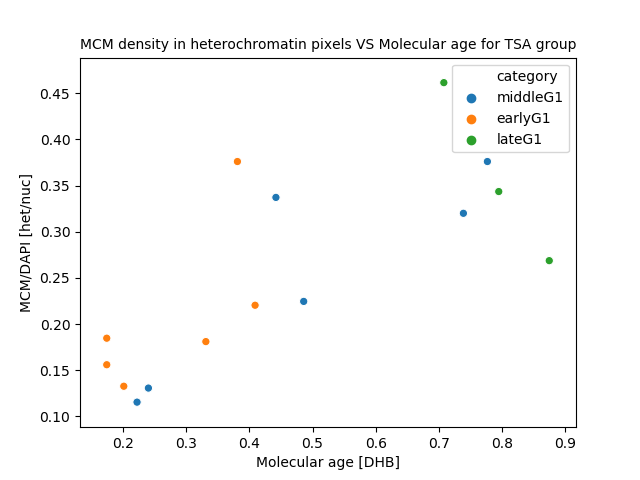

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for TSA group')

In [60]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_het/TSA.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for TSA group', fontsize=10)

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


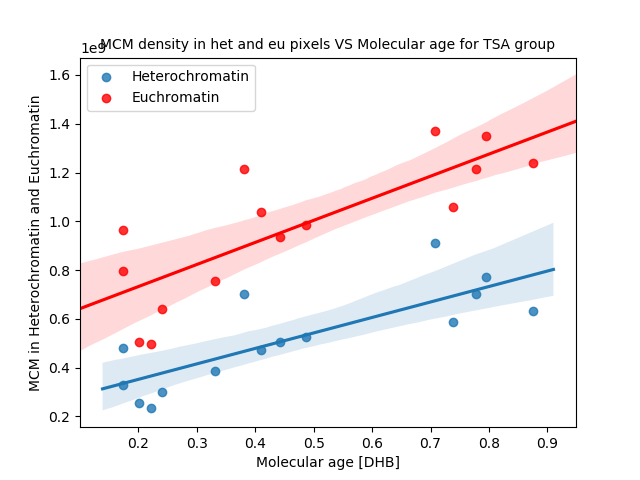

In [61]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_het
TSA['temp2']=TSA.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=TSA.loc[(['G1' in x for x in TSA.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=TSA.loc[(['G1' in x for x in TSA.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age for TSA group', fontsize=10)
plt.legend(loc="upper left")



## 11. MCM/Vol in total, het, eu

<IPython.core.display.Javascript object>


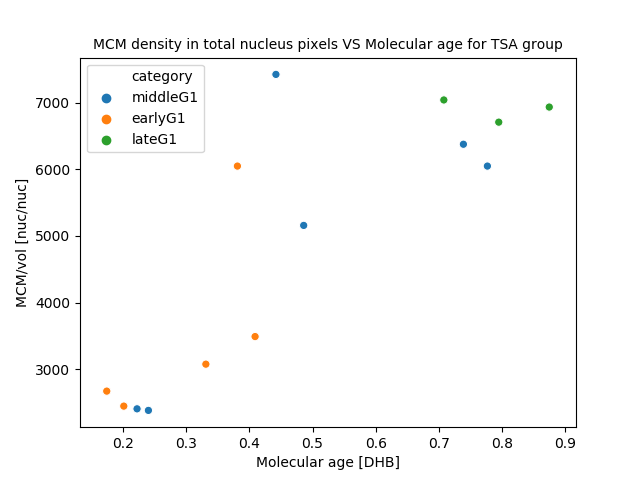

Text(0.5, 1.0, 'MCM density in total nucleus pixels VS Molecular age for TSA group')

In [62]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_total/TSA.nuc_vol_total

sn.scatterplot(x='mol_age_mod',y='temp', data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [nuc/nuc]')
plt.title('MCM density in total nucleus pixels VS Molecular age for TSA group', fontsize=10)

<IPython.core.display.Javascript object>


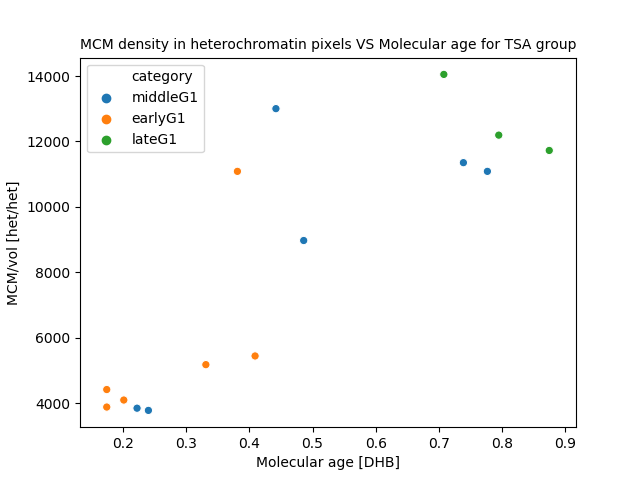

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for TSA group')

In [63]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_het/TSA.nuc_vol_het

sn.scatterplot(x='mol_age_mod',y='temp', data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for TSA group', fontsize=10)

<IPython.core.display.Javascript object>


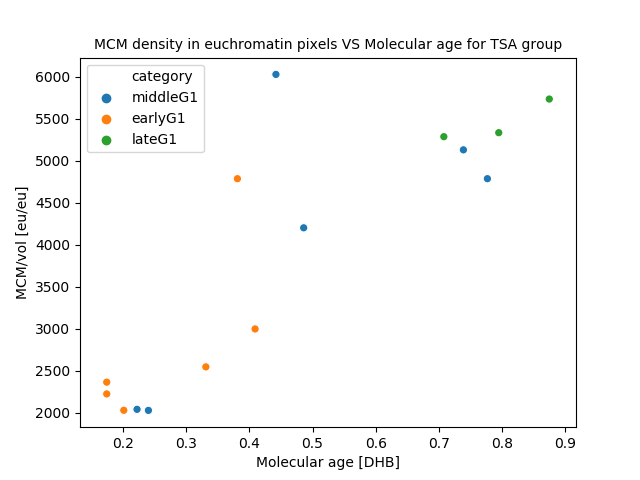

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age for TSA group')

In [64]:
%matplotlib notebook
TSA['temp']=TSA.nuc_mcm_eu/TSA.nuc_vol_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=TSA.loc[(['G1' in x for x in TSA.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age for TSA group', fontsize=10)

## mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


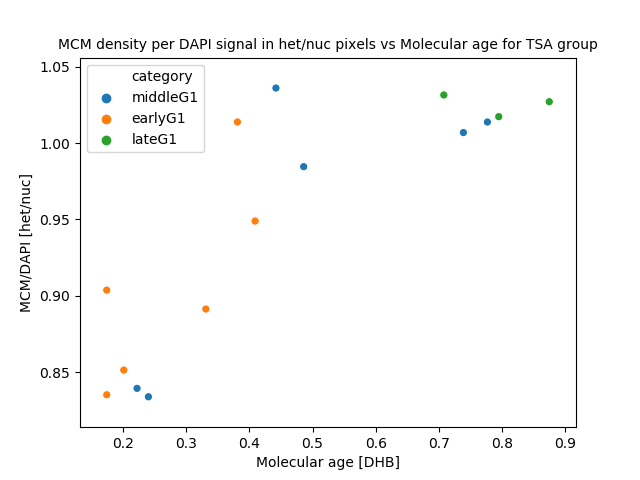

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age for TSA group')

In [65]:
%matplotlib notebook
TSA['temp']=(TSA.nuc_mcm_het/TSA.nuc_DAPI_het)/(TSA.nuc_mcm_total/TSA.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=TSA.loc[(['G1' in x for x in TSA.category]), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age for TSA group', fontsize=10)